# Content and Objectives

- Show points in the complex plane of different modulation schemes

# Import

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib


In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=False)

matplotlib.rc('figure', figsize=(18, 10) )


# showing figures inline
%matplotlib inline

# Show Schemes...

In [3]:
# set parameter for all schemes
M = 16

In [4]:
# get constellation and normalize 
ask =  2. * np.arange( 0, M ) - M + 1
ask /= np.sqrt( np.average( np.abs( ask )**2 ) )


psk = np.exp( 1j * 2 * np.pi * ( np.arange(1, M+1 ) -1 ) / M )
psk /= np.sqrt( np.average( np.abs( psk )**2 ) )


# Gray encoded QAM
k = int( np.log2( M ) )  

qam = np.zeros( M, dtype=complex )

for m in range( 0, M ):   
    # int to binary string
    b_bin = np.binary_repr(m, width=k)
        
    # map binary to +-1
    b = [ (-1)**(int(x)) for x in b_bin]

    d = np.sqrt(M)/2
    dx = 1
    dy = 1
    s = 0+1j*0
    
    # determine signal point
    for n in np.arange(0, int(k/2)):
        dx *= b[2*n]
        dy *= b[2*n+1]
        s += d*(dx+1j*dy)
        d = d/2;       
        
    qam[m] = s

qam /= np.sqrt( np.average( np.abs( qam )**2 ) )


<Figure size 1800x1000 with 0 Axes>

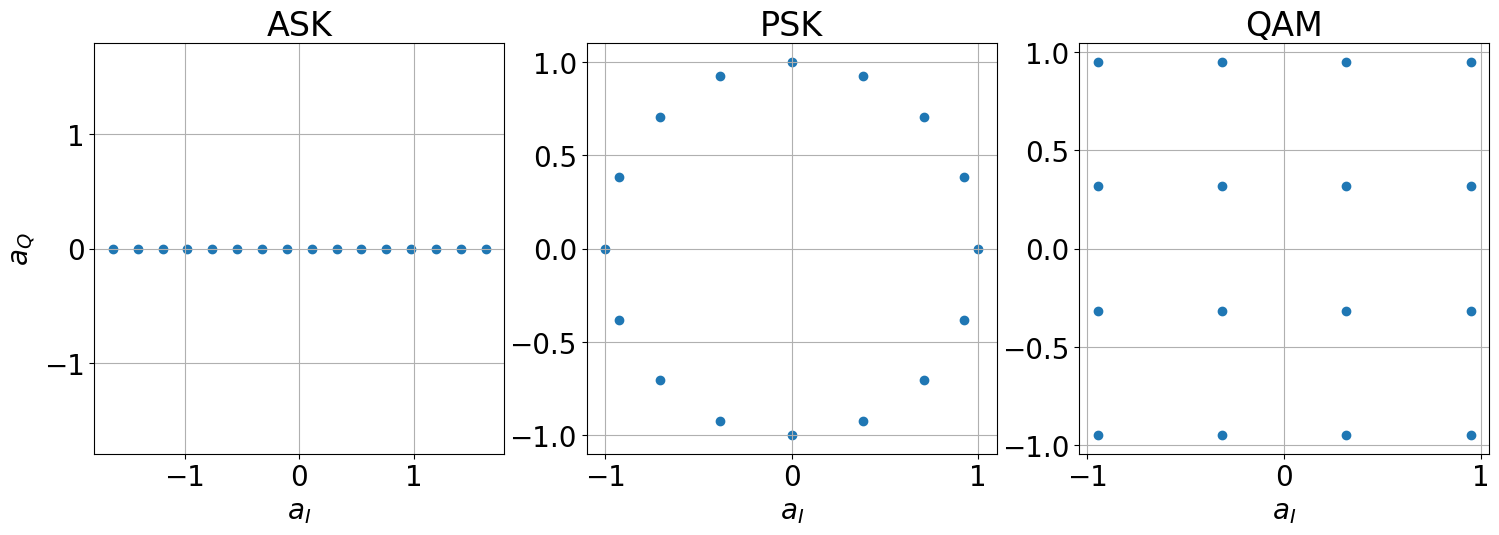

In [5]:
plt.figure()

max_x_lim = np.max( ask ) * 1.1

fig, axs = plt.subplots(1, 3)

ax = plt.subplot(131)
plt.scatter( np.real( ask ), np.imag( ask ) )
plt.xlabel('$a_I$'); plt.ylabel('$a_Q$')
plt.grid(1); plt.title('ASK')
ax.set_xlim( (- max_x_lim, max_x_lim ) ) 
ax.set_ylim( (- max_x_lim, max_x_lim )  )

plt.subplot(132)
plt.scatter( np.real( psk ), np.imag( psk ) )
plt.xlabel('$a_I$');
plt.grid(1); plt.title('PSK')
ax.set_xlim( (- max_x_lim, max_x_lim ) ) 
ax.set_ylim( (- max_x_lim, max_x_lim )  )

plt.subplot(133)
plt.scatter( np.real( qam ), np.imag( qam ) )
plt.xlabel('$a_I$');
plt.grid(1); plt.title('QAM')
ax.set_xlim( (- max_x_lim, max_x_lim ) ) 
ax.set_ylim( (- max_x_lim, max_x_lim )  )

for ax in axs:
    ax.set_aspect("equal")  # Ensuring square aspect ratio


plt.show()